# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [293]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df1 = pd.read_csv(data_path)

print('The shape of the dataset is:', df1.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [294]:
df1.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

### Check on NUllS

In [338]:
# Let's see the data types and non-null values for each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [339]:
df1.isnull().sum().sort_values(ascending=False).head()


MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [340]:
round(df1.isnull().sum(axis=0)*100/df1.shape[0],2).sort_values(ascending=False).head() # precentage of nulls 

MINIMUM_PAYMENTS    3.50
CREDIT_LIMIT        0.01
CUST_ID             0.00
BALANCE             0.00
PRC_FULL_PAYMENT    0.00
dtype: float64

----> So, the Maximum precentage of Nulls is 3.50%  So removing nulls will not affect on Data

#### Check on duplication

In [341]:
df1.duplicated().sum() # check on duplication 

0

### Statistics for numerical columns

In [342]:
# This will print basic statistics for numerical columns
df1.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [343]:
print(df1.loc[df1["CASH_ADVANCE_FREQUENCY"]>1].count().head())
df1.loc[df1["CASH_ADVANCE_FREQUENCY"]>1]

CUST_ID              8
BALANCE              8
BALANCE_FREQUENCY    8
PURCHASES            8
ONEOFF_PURCHASES     8
dtype: int64


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
681   C10708  5656.069801           1.000000     362.36            362.36   
1626  C11680  2876.009336           1.000000     152.61            152.61   
2555  C12629  5906.184924           1.000000     141.80            141.80   
2608  C12684  7801.511533           1.000000     231.40            231.40   
3038  C13127  3846.742530           1.000000       0.00              0.00   
3253  C13347  5709.486507           0.833333       0.00              0.00   
8055  C18273  1917.895730           1.000000     285.07            285.07   
8365  C18588  3857.562230           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
681                      0.0   7240.433194             0.250000   
1626                     0.0   3719.650168             0.333333   
2555                     0.0   1651.286918             0.125000   
2608                     0.0   4109.465221             0.100000   
3038                     0.0   1932.460679             0.000000   
3253                     0.0   2794.326341             0.000000   
8055                     0.0   6084.858872             0.363636   
8365                     0.0   2127.213754             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
681                     0.250000                               0.0   
1626                    0.333333                               0.0   
2555                    0.125000                               0.0   
2608                    0.100000                               0.0   
3038                    0.000000                               0.0   
3253                    0.000000                               0.0   
8055                    0.363636                               0.0   
8365                    0.000000                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
681                 1.250000                12              2        8000.0   
1626                1.166667                24              2        4000.0   
2555                1.125000                12              2       10000.0   
2608                1.100000                20              3       13500.0   
3038                1.500000                18              0        5600.0   
3253                1.166667                10              0        6000.0   
8055                1.090909                28              6        3000.0   
8365                1.142857                26              0        5000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
681    683.421497       2036.877611               0.0       8  
1626   248.342971        584.926336               0.0       6  
2555   933.969974        919.289675               0.0       8  
2608  1593.617739       1522.496755               0.0      10  
3038   496.245836        538.346874               0.0       6  
3253   550.513331       1299.463370               0.0       6  
8055  5692.682993        556.449635               0.0      11  
8365   617.508991        538.396872               0.0       7

---->Maximum of column "CASH_ADVANCE_FREQUENCY" not 1 as it said in data description there are 8 rows withthat ,max is 1.5 

#### Drop Nulls

In [345]:
df=df1.copy()

In [346]:
df.dropna(inplace=True)


#### Drop unnessery column

In [347]:
df.drop(columns="CUST_ID",inplace=True)

In [349]:
df.reset_index(inplace=True,drop=True)

In [350]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8631    58.644883         43.473717          0.000000       6  
8632   325.594462         48.886365          0.500000       6  
8633    81

### Outliers

In [305]:
import seaborn as sns

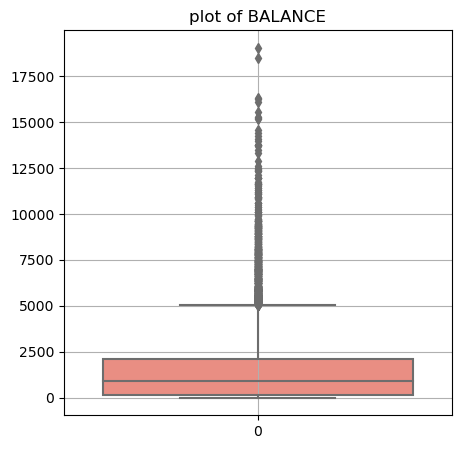

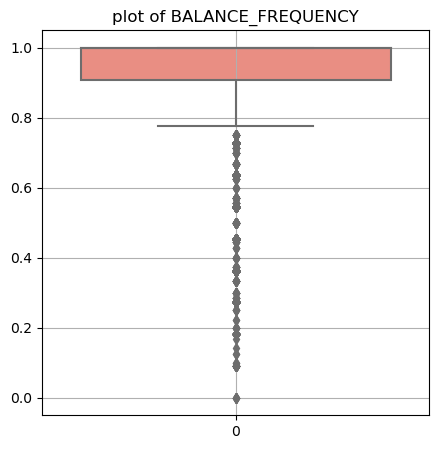

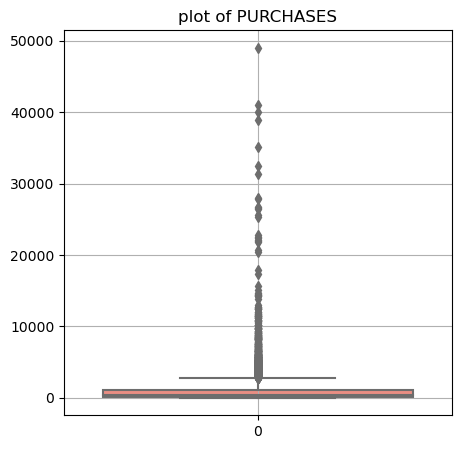

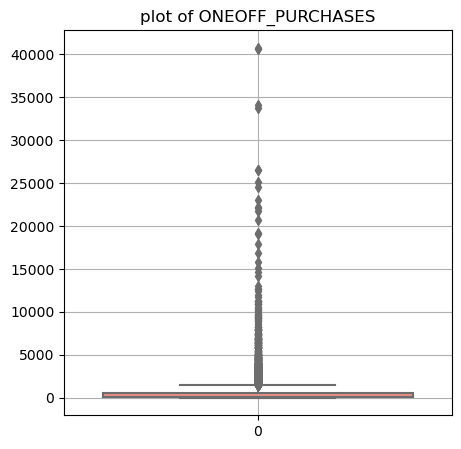

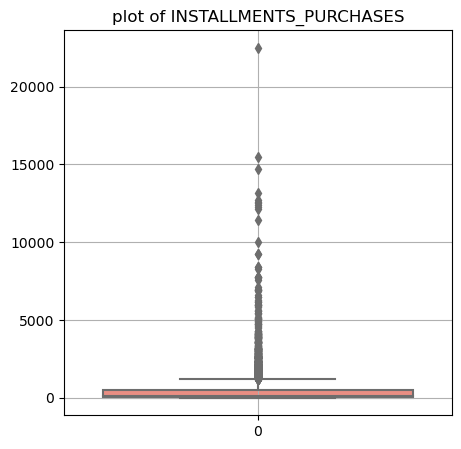

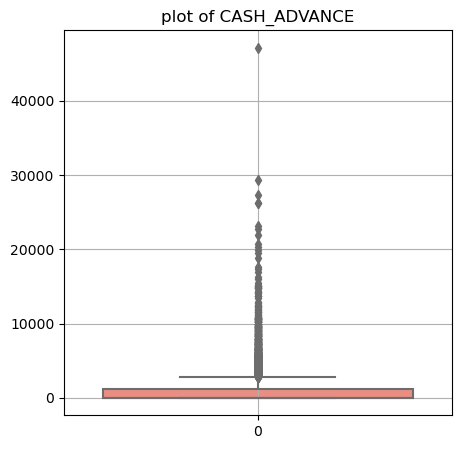

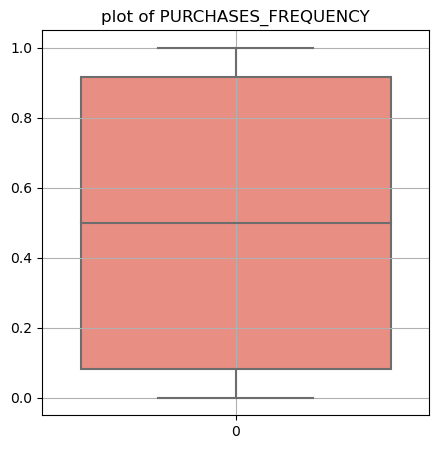

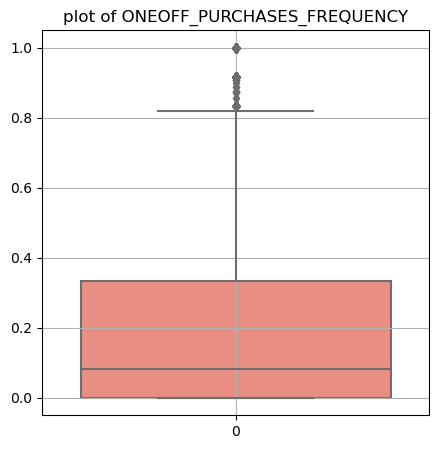

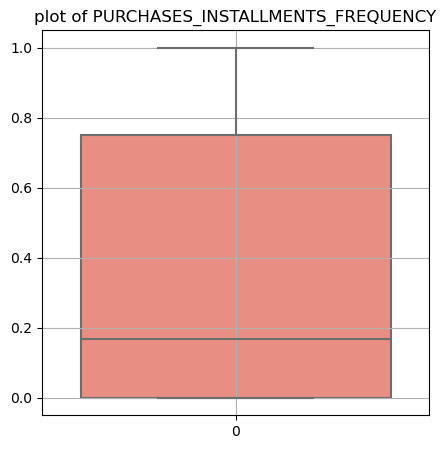

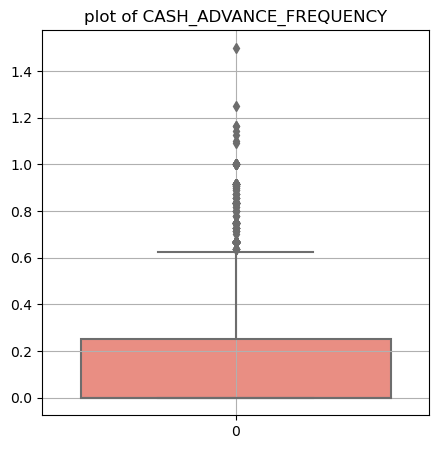

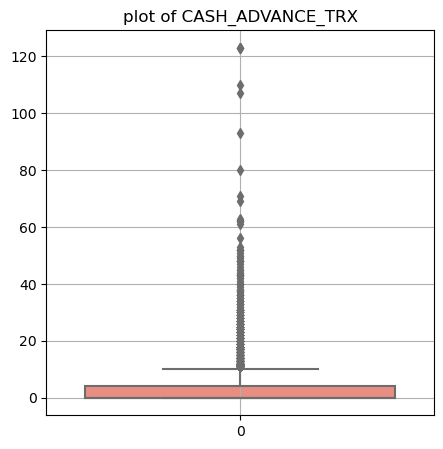

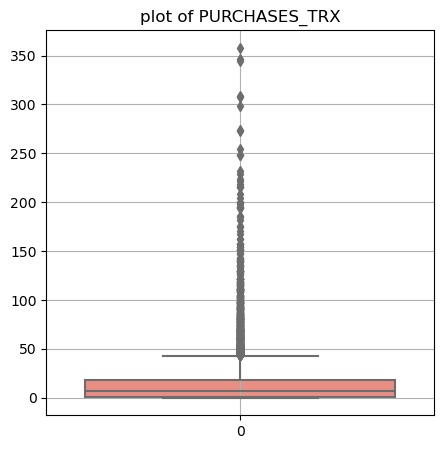

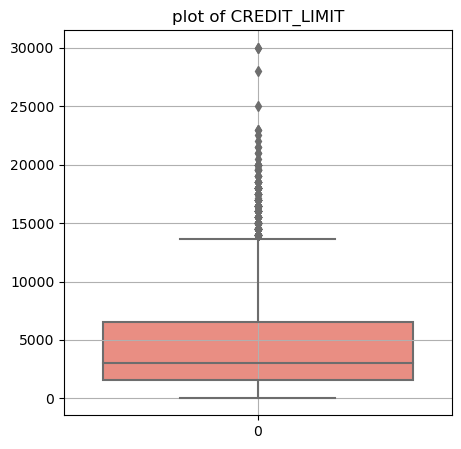

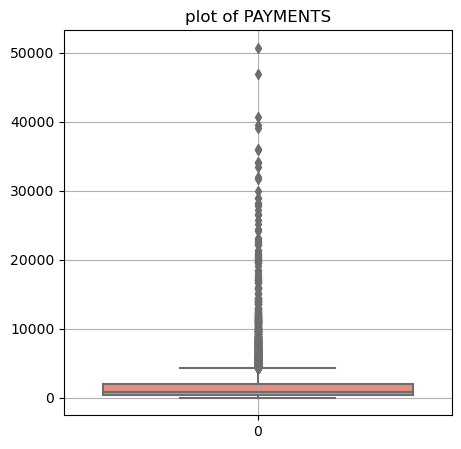

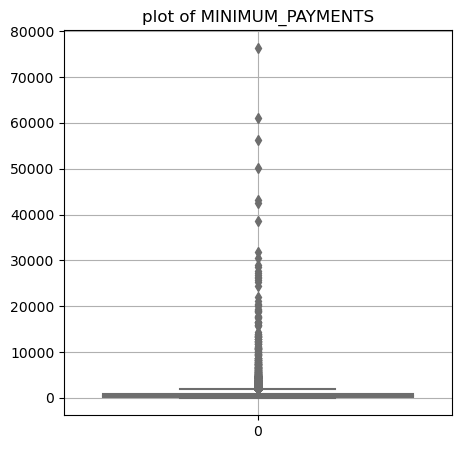

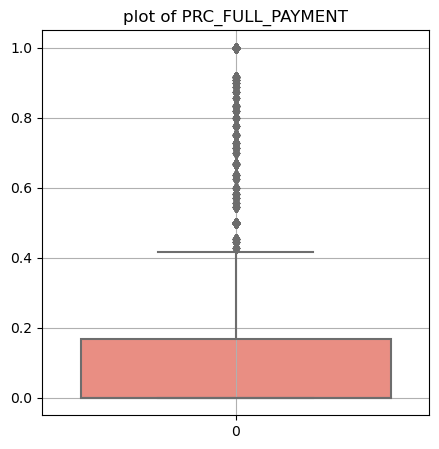

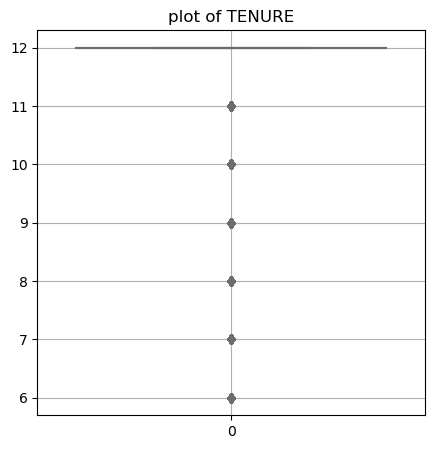

In [306]:

for i in df.columns:
    fig = plt.figure(figsize =(5, 5))
    sns.boxplot(df[i], color='salmon')
    plt.title(f'plot of {i}')
    plt.grid(True)

plt.show()

----> from previous visulization  we notice there is outliers in almost all features expect  (PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY) <br>
The majority of columns positive skewness, with only one column showing approximately normal distribution (purchased frequency), and one column displaying negative skewness (balance frequency)<br>

According to business those outliers not should be removed  as it <br>

## Histogram

In [250]:
def Histogram(bins,column):
    # Create histogram
        plt.hist(df[column], bins=bins, color='blue', edgecolor='black')

        counts, bins = np.histogram(df[column], bins=bins)
        percentages = (counts / len(df[column])) * 100

        
        for count, bin_edge, percentage in zip(counts, bins[:-1], percentages):
                plt.annotate(f'{percentage:.2f}%', xy=(bin_edge + np.diff(bins)[0] / 2, count), xytext=(0, 1),
                            textcoords='offset points', ha='center', va='bottom', fontsize=8, color='red')

        plt.tight_layout()
        # Add labels and title
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')

        # Show plot
        plt.show()

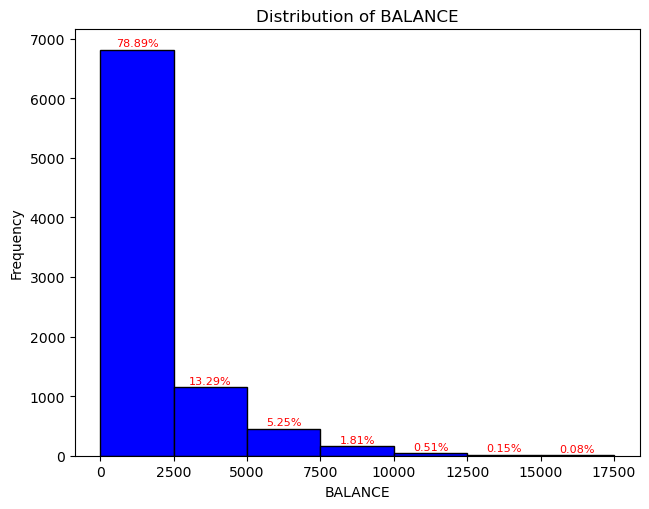

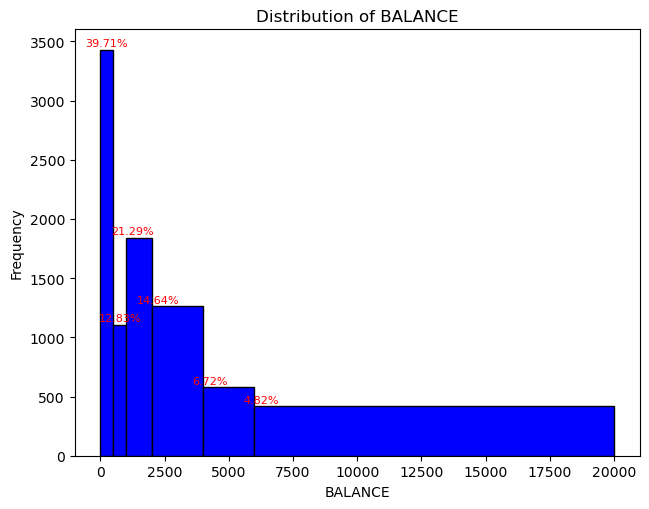

In [307]:
bins = [0, 2500,5000,7500,10000,12500,15000,17500]
Histogram(bins,"BALANCE")

bins =  [0, 500, 1000, 2000,4000, 6000, 20000]

Histogram(bins,"BALANCE")


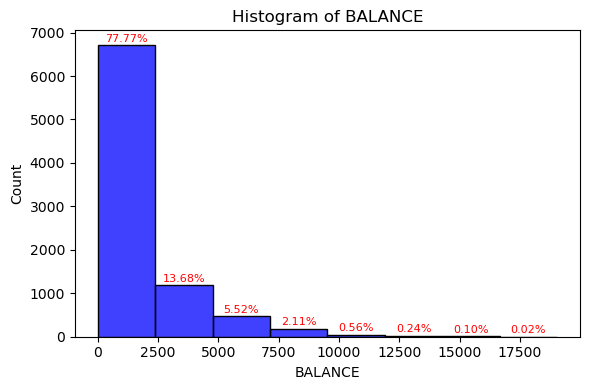

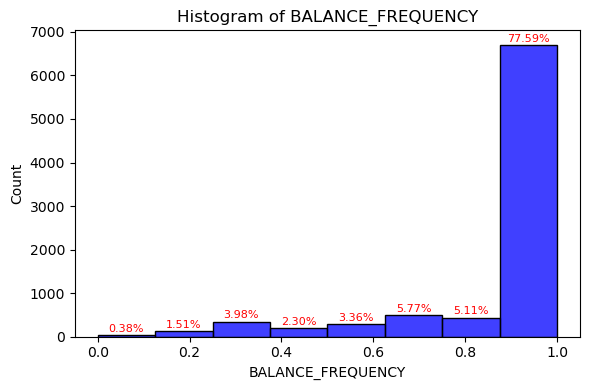

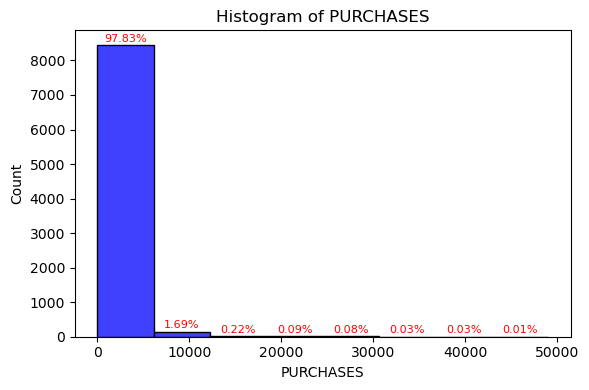

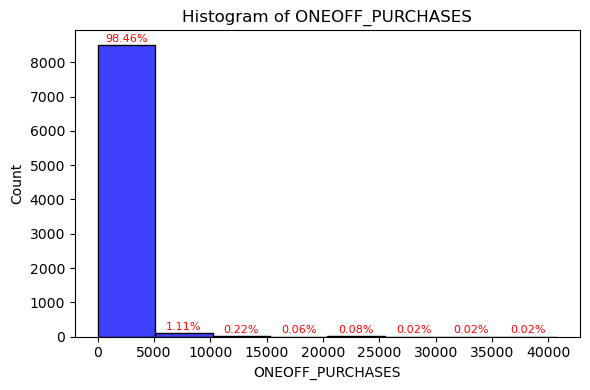

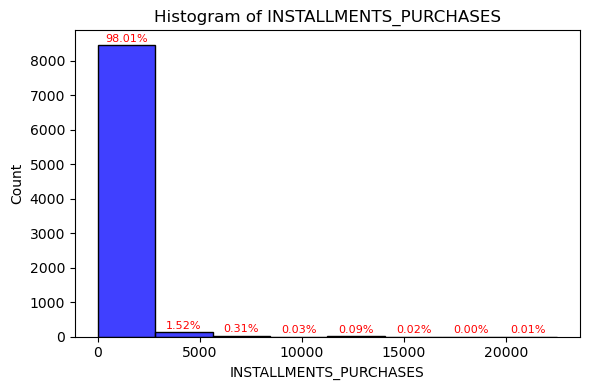

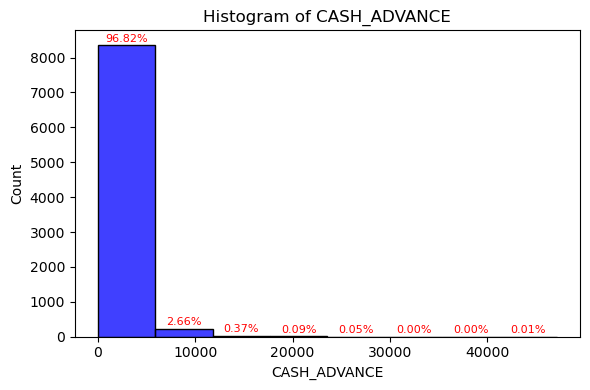

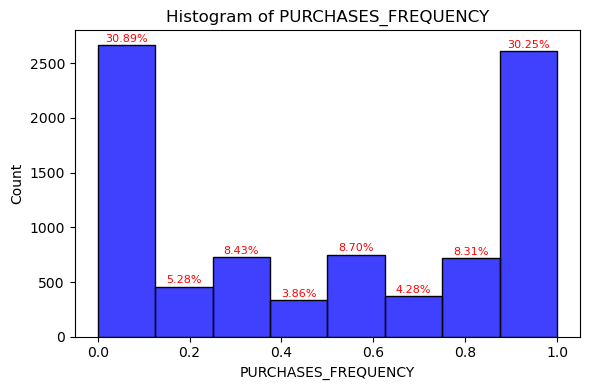

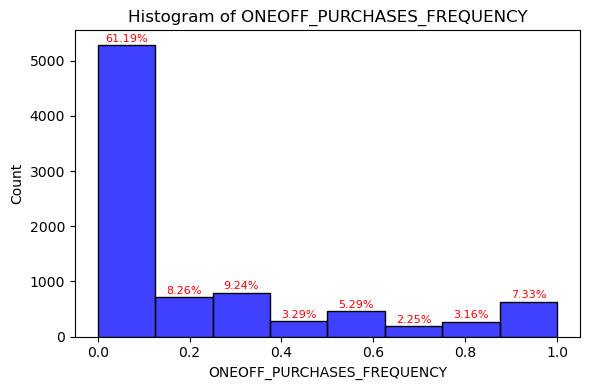

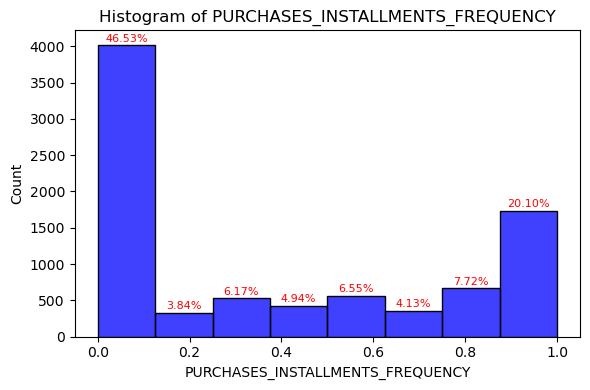

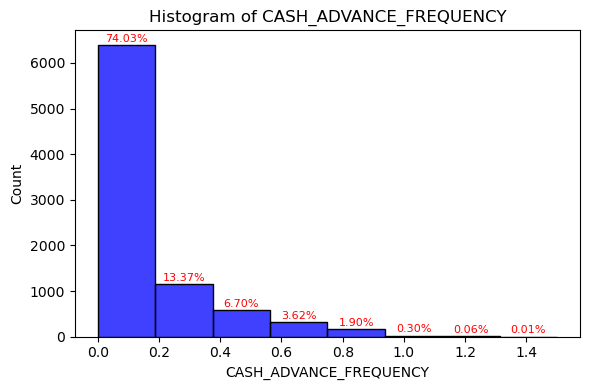

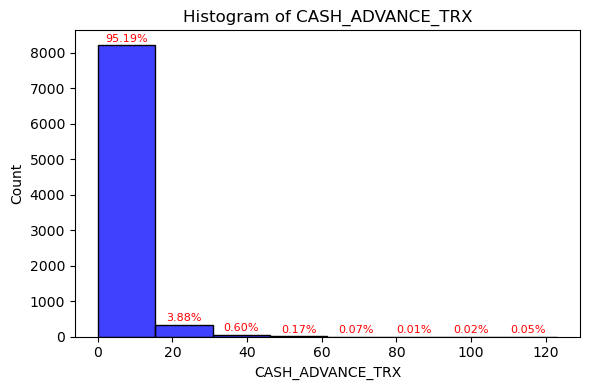

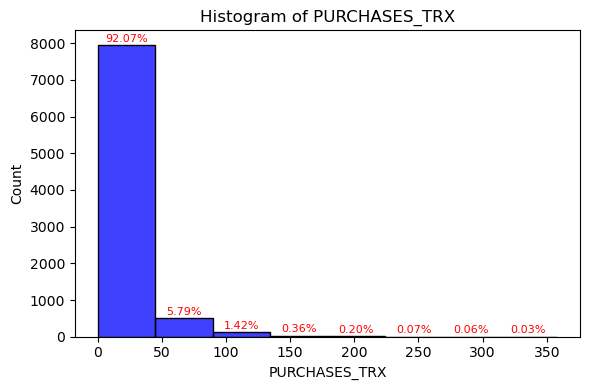

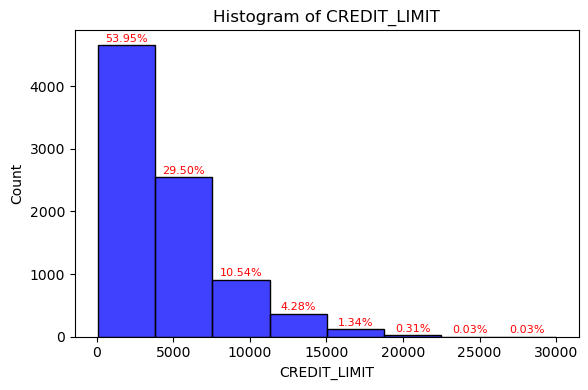

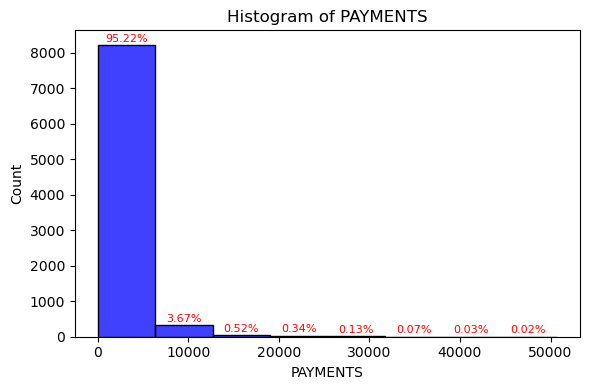

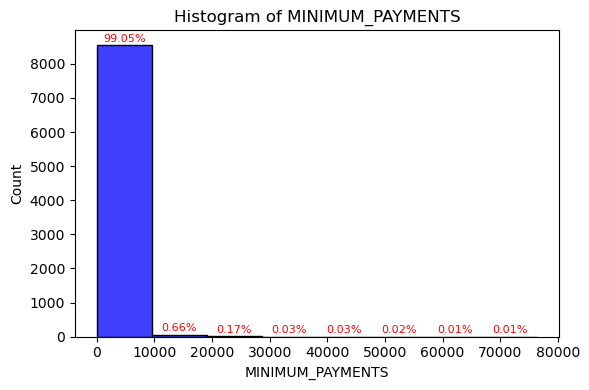

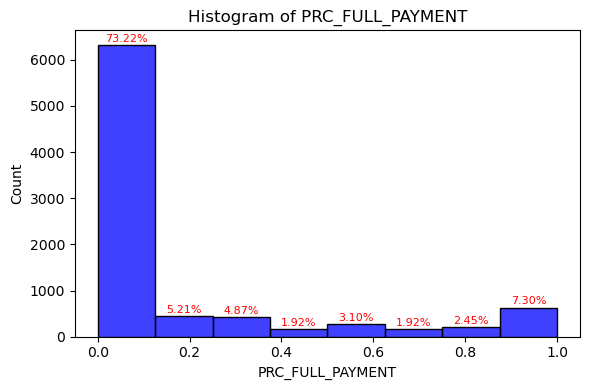

In [308]:
for column in df.drop(columns=['TENURE']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=8, kde=False, color='blue', edgecolor='black')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {column}')

    counts, bins = np.histogram(df[column], bins=8)
    percentages = (counts / len(df[column])) * 100

   
    for count, bin_edge, percentage in zip(counts, bins[:-1], percentages):
        plt.annotate(f'{percentage:.2f}%', xy=(bin_edge + np.diff(bins)[0] / 2, count), xytext=(0, 1),
                     textcoords='offset points', ha='center', va='bottom', fontsize=8, color='red')

    plt.tight_layout()
    plt.show()

Insights from the prevoius plots of data<br>
 1- Account balance<br>
77.77% of customers mantain account balance not exceeding 2300$ so most of customer prefer spending money.<br>

 2- Balance Freguency<br>
77.58% Most of customers updated their account balance so they always use it and activate their credit card frequently<br>

3- Purchers<br>
97.83% most of customers make pruchers<br>

 4-Most customers 98\% prefer purchases made in installments, with the majority opting for purchases under $5000, indicating a preference for budget-friendly spending and manageable repayment plans.<br>
 5-Purchase Frequency<br>
30.8% of customers make pruchers frequently,30 not make purchers frequently and the other between them vary from customer to another.<br>

 6- ONEOFF_PURCHASES_FREQUENCY<br>
61.19% not prefer make purcheres in on_go<br>

 7- PURCHASES_INSTALLMENTS_FREQUENCY<br>
46.5% not prefer purchers installments but about 27.5 prefer purchers installments<br>

8- CASH_ADVANCE_FREQUENCY<br>
85% and more not prefer cash-frequency so they avoid this method of payment<br>

 9- CASH_ADVANCE_TRX ,PURCHASES_TRX<br>
92.07 made a number of purchers so they prefer make most frequences<br>

10- CREDIT_LIMIT<br>
more than 54.9% have a limit in credit cards not excedding 4000$ so it is good to be intermediate credit card limit<br>

11- payment_Behaviour: The total amount of money paid towards the credit card balance.<br>
95.22 of customers save their credit card active because they pay for it <br>

 12- MINIMUM_PAYMENTS :The minimum amount required to be paid each billing cycle to avoid late fees.<br>
99% of customers avoid late fees <br>

 13- PRC_FULL_PAYMENT :The percentage of times a customer pays the full balance due each month<br>
more that 73.2% of customers not prefer pay full balance due each month <br>

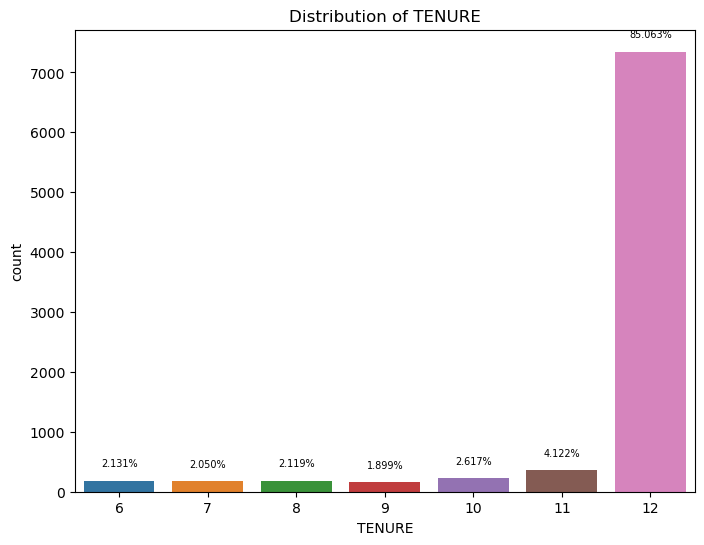

In [253]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='TENURE')

# Calculate percentages
total = len(df['TENURE'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.3%}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 10), 
                textcoords='offset points', 
                ha='center', 
                fontsize=7)

plt.title('Distribution of TENURE')
plt.show()

Most of customer credit_cart is  tenure ---> 12 month

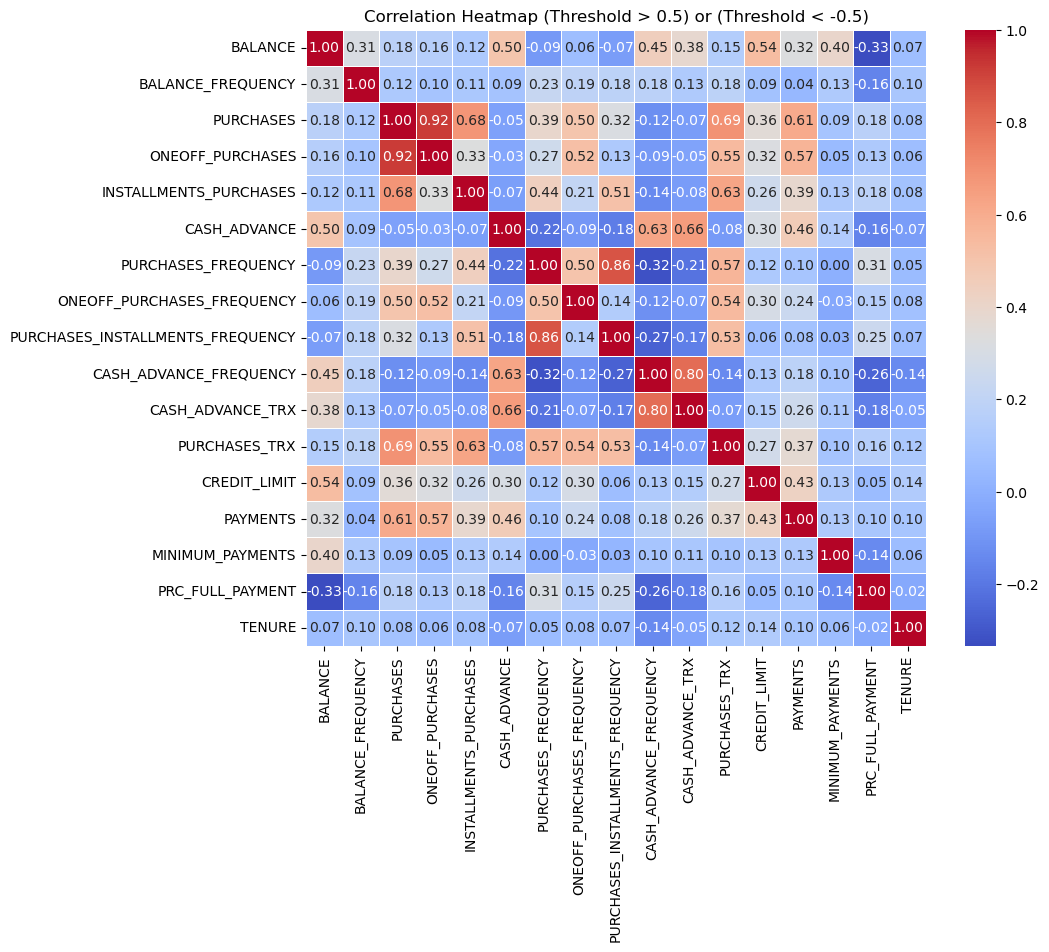

In [309]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Threshold > 0.5) or (Threshold < -0.5)')
plt.show()


##### There are some columns correlated to each other
######   1-PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY
######   2-PURCHASES, ONEOFF_PURCHASES
######   3-CASH_ADVANCE_TRX, CASH_ADVANCE_FREQUENCY
##### --->There are high correlation features but they have business meaning

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part

1- null values     <br>
2- unimportant columns          <br>
3- outliers        <br>


In [310]:
df.dropna(inplace=True)
df.isnull().sum().sort_values(ascending=False).head()


BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64

#### 3-  Handel outliers in fourth section      <br>

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

In [311]:
from sklearn.manifold import TSNE
from sklearn import preprocessing
import numpy as np


---> Select columns that only needed to transformation 

In [355]:
def tsne_fun(Features):
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(Features)
    df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
    # Plotting
    sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
    plt.title('Clusters Visualized with t-SNE')
    plt.show()
    return df_tsne

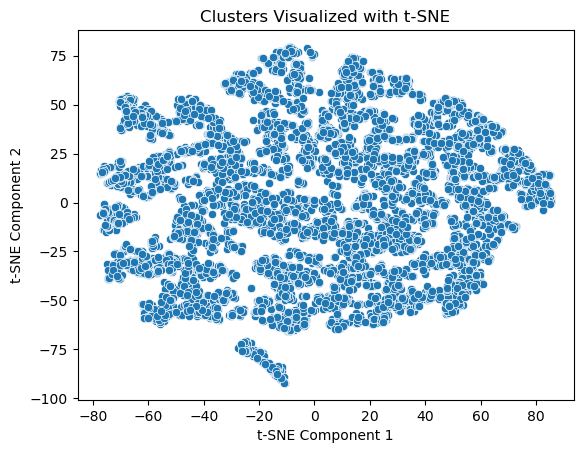

In [356]:
df_tsne=tsne_fun(df)


---->According to previous figure embadding has no structure <br>

### So we will try many techniques to improve struture of embedding
1- StandardScaler        <br>
2- MinMaxScaler          <br>
3- RobustScaler          <br>
4- Log_Scaler            <br>

In [258]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [357]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8631    58.644883         43.473717          0.000000       6  
8632   325.594462         48.886365          0.500000       6  
8633    81

In [363]:
columns =                ['BALANCE', 
                          'PURCHASES',
                          'ONEOFF_PURCHASES',
                          'INSTALLMENTS_PURCHASES',
                          'CASH_ADVANCE',  'CREDIT_LIMIT',
                          'PAYMENTS',
                          'MINIMUM_PAYMENTS',
                          'CASH_ADVANCE_TRX',
                          'PURCHASES_TRX'
                          ]
fcolumns =            ['CUST_ID',
                      'BALANCE_FREQUENCY',
                      'PURCHASES_FREQUENCY', 
                      'ONEOFF_PURCHASES_FREQUENCY',
                      'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'CASH_ADVANCE_FREQUENCY',
                      'PRC_FULL_PAYMENT',
                      'TENURE' ]


1- **StandardScaler**        <br>

In [366]:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df[columns])
scaled_data = pd.DataFrame(scaled_data,columns=df[columns].columns)
scaled_data

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0    -0.744625  -0.429184         -0.359160               -0.354826   
1     0.764152  -0.473208         -0.359160               -0.458839   
2     0.426602  -0.116413          0.099909               -0.458839   
3    -0.373910  -0.465825         -0.349660               -0.458839   
4     0.099551   0.142062         -0.359160                0.994815   
...        ...        ...               ...                     ...   
8631 -0.761342  -0.463563         -0.346751               -0.458839   
8632 -0.750546  -0.338865         -0.359160               -0.141436   
8633 -0.752977  -0.406572         -0.359160               -0.301402   
8634 -0.757721  -0.473208         -0.359160               -0.458839   
8635 -0.586278   0.031295          0.289957               -0.458839   

      CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0        -0.468655     -0.962575 -0.543942         -0.305508   
1         2.568556      0.677204  0.796852          0.087689   
2        -0.468655      0.813852 -0.399503         -0.099906   
3        -0.468655     -0.907916 -0.380165         -0.261131   
4        -0.468655     -0.743938 -0.132119          0.650363   
...            ...           ...       ...               ...   
8631     -0.468655     -1.099224 -0.593143         -0.345988   
8632     -0.468655     -0.962575 -0.501396         -0.343706   
8633     -0.468655     -0.962575 -0.585367         -0.329572   
8634     -0.451422     -1.099224 -0.595238         -0.340811   
8635     -0.408769     -0.907916 -0.591589         -0.327098   

      CASH_ADVANCE_TRX  PURCHASES_TRX  
0            -0.479437      -0.517623  
1             0.099258      -0.597054  
2            -0.479437      -0.120467  
3            -0.479437      -0.557339  
4            -0.479437      -0.279329  
...                ...            ...  
8631         -0.479437      -0.557339  
8632         -0.479437      -0.358760  
8633         -0.479437      -0.398476  
8634         -0.190089      -0.597054  
8635         -0.190089       0.316405  

[8636 rows x 10 columns]

In [367]:
scaled_data[fcolumns] = df[fcolumns]
scaled_data

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0    -0.744625  -0.429184         -0.359160               -0.354826   
1     0.764152  -0.473208         -0.359160               -0.458839   
2     0.426602  -0.116413          0.099909               -0.458839   
3    -0.373910  -0.465825         -0.349660               -0.458839   
4     0.099551   0.142062         -0.359160                0.994815   
...        ...        ...               ...                     ...   
8631 -0.761342  -0.463563         -0.346751               -0.458839   
8632 -0.750546  -0.338865         -0.359160               -0.141436   
8633 -0.752977  -0.406572         -0.359160               -0.301402   
8634 -0.757721  -0.473208         -0.359160               -0.458839   
8635 -0.586278   0.031295          0.289957               -0.458839   

      CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0        -0.468655     -0.962575 -0.543942         -0.305508   
1         2.568556      0.677204  0.796852          0.087689   
2        -0.468655      0.813852 -0.399503         -0.099906   
3        -0.468655     -0.907916 -0.380165         -0.261131   
4        -0.468655     -0.743938 -0.132119          0.650363   
...            ...           ...       ...               ...   
8631     -0.468655     -1.099224 -0.593143         -0.345988   
8632     -0.468655     -0.962575 -0.501396         -0.343706   
8633     -0.468655     -0.962575 -0.585367         -0.329572   
8634     -0.451422     -1.099224 -0.595238         -0.340811   
8635     -0.408769     -0.907916 -0.591589         -0.327098   

      CASH_ADVANCE_TRX  PURCHASES_TRX  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0            -0.479437      -0.517623           0.818182             0.166667   
1             0.099258      -0.597054           0.909091             0.000000   
2            -0.479437      -0.120467           1.000000             1.000000   
3            -0.479437      -0.557339           1.000000             0.083333   
4            -0.479437      -0.279329           1.000000             0.666667   
...                ...            ...                ...                  ...   
8631         -0.479437      -0.557339           0.500000             0.166667   
8632         -0.479437      -0.358760           1.000000             1.000000   
8633         -0.479437      -0.398476           0.833333             0.833333   
8634         -0.190089      -0.597054           0.833333             0.000000   
8635         -0.190089       0.316405           0.666667             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT  TENURE  
0                   0.000000          0.000000      12  
1                   0.250000          0.222222      12  
2                   0.000000          0.000000      12  
3                   0.000000          0.000000      12  
4                   0.000000          0.000000      12  
...                      ...               ...     ...  
8631                0.000000          0.000000       6  
8632                0.000000          0.500000       6  
8633                0.000000          0.250000       6  
8

In [368]:
scaled_data.describe()

BALANCE     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  8636.000000  8.636000e+03      8.636000e+03            8.636000e+03   
mean      0.000000  1.151876e-17     -3.291073e-17           -2.797412e-17   
std       1.000058  1.000058e+00      1.000058e+00            1.000058e+00   
min      -0.764144 -4.732082e-01     -3.591603e-01           -4.588390e-01   
25%      -0.693469 -4.531953e-01     -3.591603e-01           -4.588390e-01   
50%      -0.326598 -2.999696e-01     -3.324445e-01           -3.554965e-01   
75%       0.240507  5.562856e-02     -3.444604e-03            6.901931e-02   
max       8.323708  2.215714e+01      2.384284e+01            2.407255e+01   

       CASH_ADVANCE  CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  \
count  8.636000e+03  8.636000e+03  8.636000e+03      8.636000e+03   
mean  -4.278395e-17  1.118965e-16 -2.632859e-17     -4.442949e-17   
std    1.000058e+00  1.000058e+00  1.000058e+00      1.000058e+00   
min   -4.686555e-01 -1.222207e+00 -6.132812e-01     -3.643042e-01   
25%   -4.686555e-01 -7.985975e-01 -4.694457e-01     -2.930083e-01   
50%   -4.686555e-01 -4.159823e-01 -3.051243e-01     -2.326108e-01   
75%    6.515234e-02  5.405558e-01  5.727990e-02     -1.635812e-02   
max    2.175188e+01  6.963026e+00  1.681891e+01      3.184159e+01   

       CASH_ADVANCE_TRX  PURCHASES_TRX  BALANCE_FREQUENCY  \
count      8.636000e+03   8.636000e+03        8636.000000   
mean       2.715136e-17  -1.151876e-17           0.895035   
std        1.000058e+00   1.000058e+00           0.207697   
min       -4.794369e-01  -5.970542e-01           0.000000   
25%       -4.794369e-01  -5.573385e-01           0.909091   
50%       -4.794369e-01  -3.190448e-01           1.000000   
75%        9.925796e-02   1.178270e-01           1.000000   
max        1.731543e+01   1.362114e+01           1.000000   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8636.000000                 8636.000000   
mean              0.496000                    0.205909   
std               0.401273                    0.300054   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.333333   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8636.000000             8636.000000   
mean                           0.368820                0.137604   
std                            0.398093                0.201791   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.250000   
max                            1.000000                1.500000   

       PRC_FULL_PAYMENT       TENURE  
count       8636.000000  8636.000000  
mean           0.159304    11.534391  
std            0.296271     1.310984  
min            0.000000     6.000000  
25%            0.000000    12.000000  
50%            0.000000    12.000000  
75%            0.166667    12.000000  
max            1.000000    12.000000

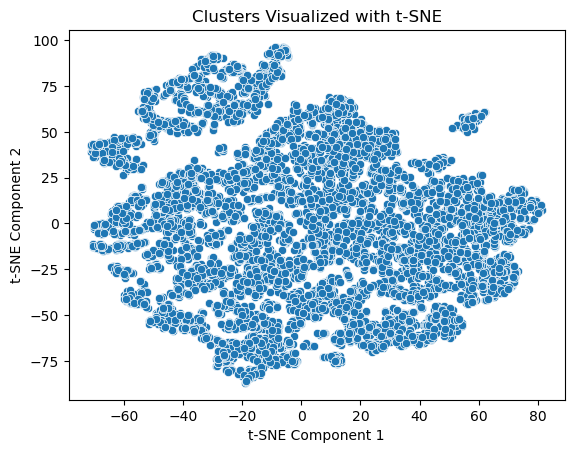

t-SNE Component 1  t-SNE Component 2
0            -43.937073         -46.438301
1             -2.532619          38.694500
2             19.087971          11.770617
3            -40.358921         -30.703606
4             20.648211         -39.473515
...                 ...                ...
8631          -8.066874          83.841087
8632          -7.219226          93.310852
8633          -8.027745          92.100967
8634          -8.254327          82.810669
8635          -9.365756          86.634636

[8636 rows x 2 columns]

In [369]:
tsne_fun(scaled_data)

2- **MinMaxScaler**          <br>

In [265]:
scaler = preprocessing.MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.shape


(8636, 17)

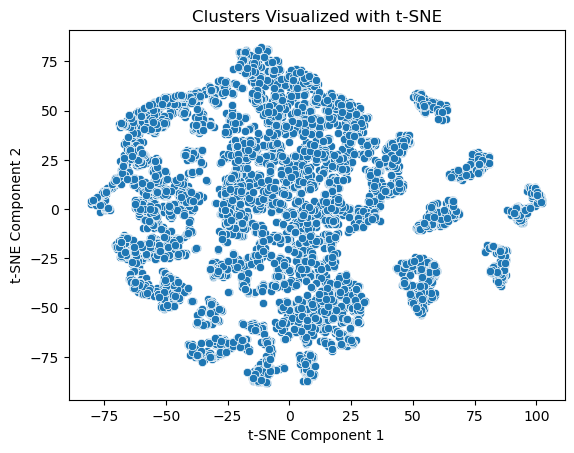

t-SNE Component 1  t-SNE Component 2
0            -39.364330         -11.515361
1              8.984535         -62.467518
2             29.641176          -3.045762
3            -30.699286         -31.106850
4            -20.134657          22.721640
...                 ...                ...
8631          91.826324           0.805483
8632         100.420273           8.902199
8633         100.311043           7.033553
8634          90.832809          -2.104956
8635          97.272102           0.614574

[8636 rows x 2 columns]

In [371]:
tsne_fun(scaled_data)

3- **RobustScaler**          <br>

In [267]:
scaler = preprocessing.RobustScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.shape

(8636, 17)

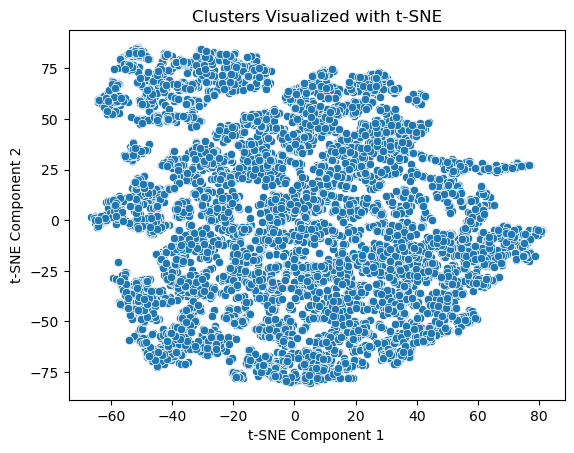

t-SNE Component 1  t-SNE Component 2
0            -37.515175         -48.274532
1             11.803576          49.938320
2             17.928129           2.000135
3            -43.266193         -16.467838
4             48.956062          15.737134
...                 ...                ...
8631         -42.463524          81.262978
8632         -51.666866          82.422928
8633         -50.070320          82.688507
8634         -41.722084          81.900215
8635         -44.740734          73.684425

[8636 rows x 2 columns]

In [373]:
tsne_fun(scaled_data)

4- **Log_Scaler**           <br>

In [269]:
scaled_data = np.log1p(df)
scaled_data.shape

(8636, 17)

In [375]:
scaled_data.head(3)

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.735304   4.568506          0.000000                4.568506   
1  8.071989   0.000000          0.000000                0.000000   
2  7.822504   6.651791          6.651791                0.000000   

   CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  CASH_ADVANCE_TRX  \
0      0.000000      6.908755  5.312231          4.945277          0.000000   
1      8.770896      8.853808  8.319725          6.978531          1.609438   
2      0.000000      8.922792  6.434654          6.442994          0.000000   

   PURCHASES_TRX  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0       1.098612           0.818182             0.166667   
1       0.000000           0.909091             0.000000   
2       2.564949           1.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   
2                         1.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT  TENURE  
0                    0.00          0.000000      12  
1                    0.25          0.222222      12  
2                    0.00          0.000000      12

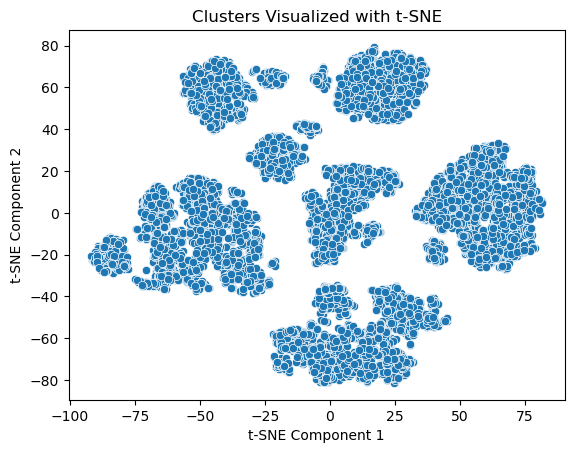

In [376]:
df_tsne=tsne_fun(scaled_data)

In [377]:
scaled_data.skew()


BALANCE                            -0.776004
PURCHASES                          -0.777688
ONEOFF_PURCHASES                    0.168420
INSTALLMENTS_PURCHASES             -0.042157
CASH_ADVANCE                        0.248169
CREDIT_LIMIT                       -0.106402
PAYMENTS                           -0.050354
MINIMUM_PAYMENTS                    0.251524
CASH_ADVANCE_TRX                    0.920619
PURCHASES_TRX                       0.009795
BALANCE_FREQUENCY                  -2.084161
PURCHASES_FREQUENCY                 0.033041
ONEOFF_PURCHASES_FREQUENCY          1.504234
PURCHASES_INSTALLMENTS_FREQUENCY    0.487753
CASH_ADVANCE_FREQUENCY              1.795915
PRC_FULL_PAYMENT                    1.886027
TENURE                             -3.011141
dtype: float64

In [378]:
df.skew()

BALANCE                              2.374254
BALANCE_FREQUENCY                   -2.084161
PURCHASES                            8.055789
ONEOFF_PURCHASES                     9.935776
INSTALLMENTS_PURCHASES               7.216133
CASH_ADVANCE                         5.139629
PURCHASES_FREQUENCY                  0.033041
ONEOFF_PURCHASES_FREQUENCY           1.504234
PURCHASES_INSTALLMENTS_FREQUENCY     0.487753
CASH_ADVANCE_FREQUENCY               1.795915
CASH_ADVANCE_TRX                     5.673327
PURCHASES_TRX                        4.578418
CREDIT_LIMIT                         1.507019
PAYMENTS                             5.873049
MINIMUM_PAYMENTS                    13.622193
PRC_FULL_PAYMENT                     1.886027
TENURE                              -3.011141
dtype: float64

It seems that the data is Highly separated into **7** clusters  <br>
So we will use log in transformation  <br>

# Clustring Algorithms

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data <br>
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result <br>
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia) <br>
4- (Optionally) make a method that pick the best number of clusters for you <br>
5- Using different techniques for scaling and comment on the result <br>

In [274]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

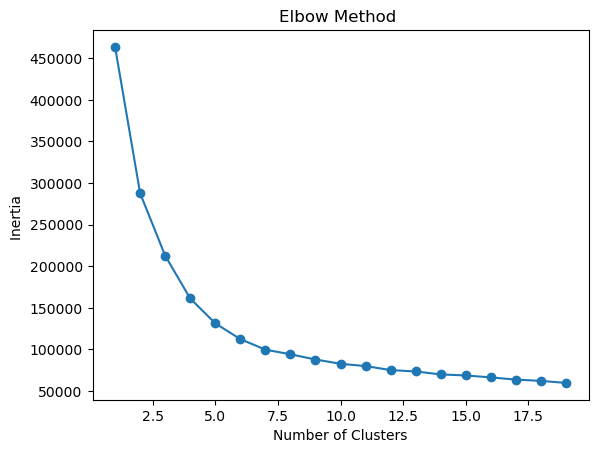

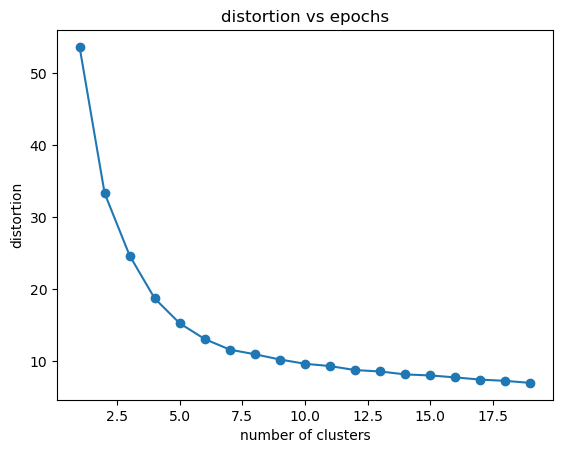

In [380]:
inertia = []
distortions=[]
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(scaled_data, kmeans.cluster_centers_, 'euclidean'), axis=1)**2) / scaled_data.shape[0])
    
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia ')
plt.title('Elbow Method ')
plt.show()

plt.plot(k_range,distortions, marker='o')

plt.title('distortion vs epochs')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()



In [381]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=7 )
kmeans1.fit(scaled_data)

KMeans(n_clusters=7)

<Axes: xlabel='t-SNE Component 1', ylabel='t-SNE Component 2'>

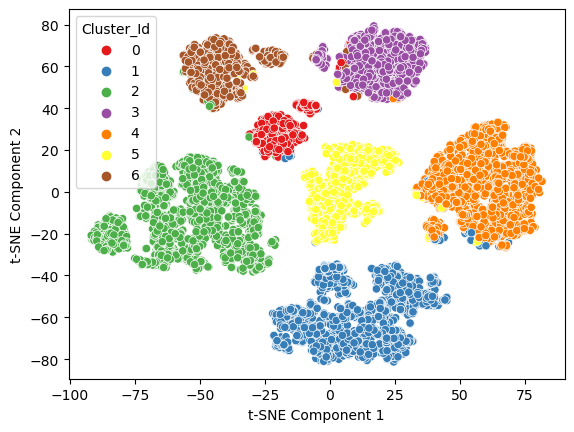

In [382]:
df_tsne['Cluster_Id'] = kmeans1.labels_
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne, hue=df_tsne['Cluster_Id'],palette='Set1')

In [383]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data , kmeans1.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4422553096779924


# DSCAN

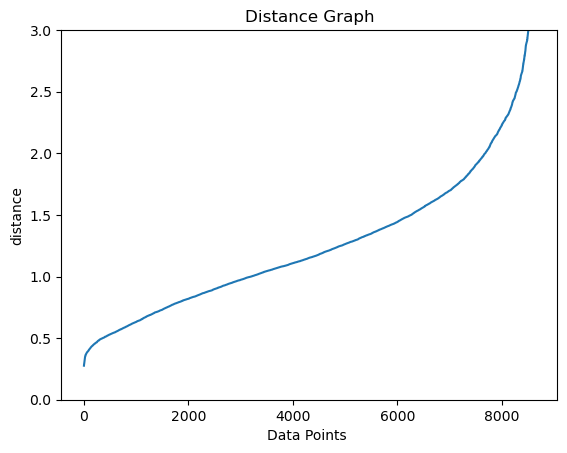

In [384]:

from sklearn.neighbors import NearestNeighbors
k = 5  # Number of nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(scaled_data)
distances, _ = nbrs.kneighbors(scaled_data)
k_distances = distances[:, -1]


k_distances_sorted = np.sort(k_distances)[::-1]

# Plot k-distance graph

plt.plot(np.arange(len(k_distances_sorted[::-1])), k_distances_sorted[::-1])
plt.xlabel('Data Points ')
plt.ylabel('distance')
plt.title('Distance Graph')
plt.ylim(0,3)
plt.show()


In [398]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=40)
labels = dbscan.fit_predict(scaled_data)
df_tsne['DBSCAN_Cluster_Id'] = labels



<Axes: xlabel='t-SNE Component 1', ylabel='t-SNE Component 2'>

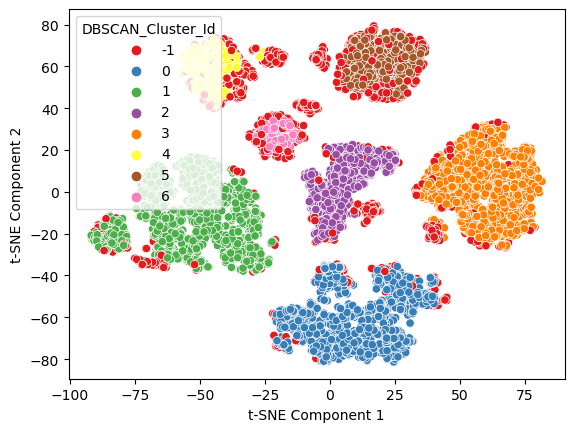

In [399]:
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne, hue=df_tsne['DBSCAN_Cluster_Id'],palette='Set1')

In [400]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data , labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3434831166544709


## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters <br>
    - Complete-Linkage Clustering<br>
    - Single-Linkage Clustering<br>
    - Average-Linkage Clustering<br>
    - Centroid Linkage Clustering<br>
2- Distance function:<br>
    - Euclidean Distance <br>
    - Manhattan Distance <br>
    - Mahalanobis distance <br>
3- Number of clusters<br>


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

# Hierarchy

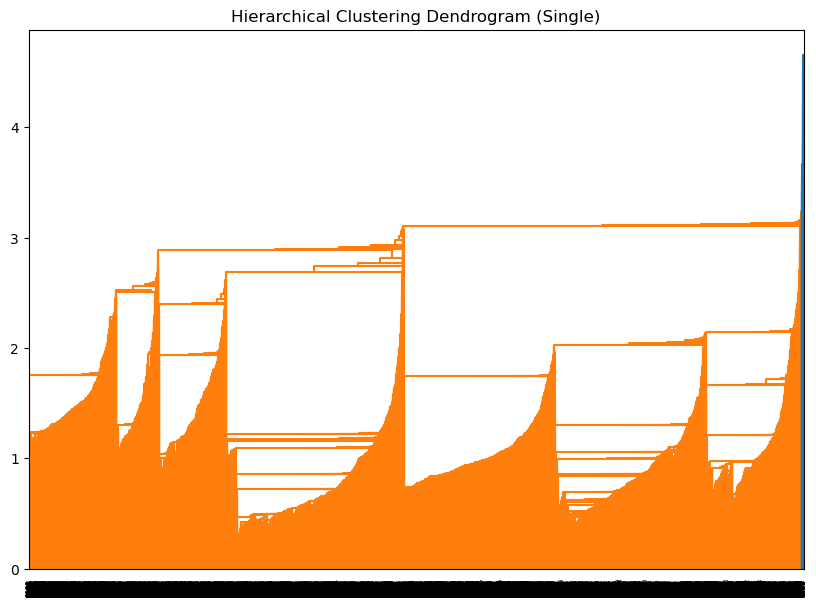

In [401]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_data, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.show()

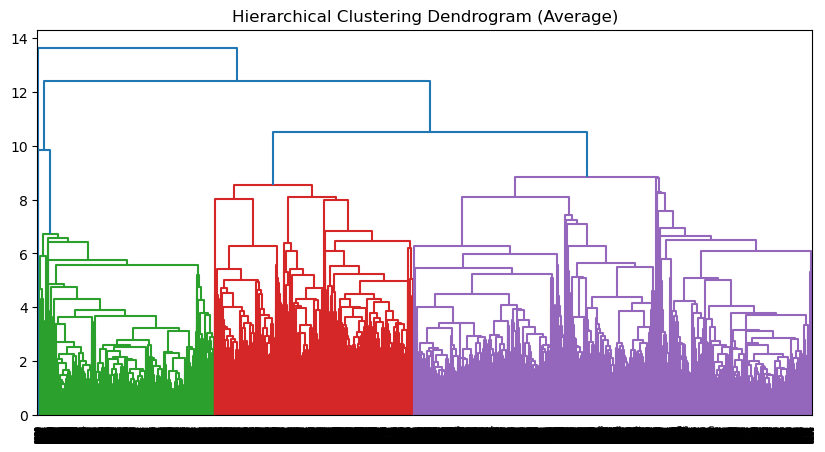

In [402]:
linked = linkage(scaled_data, 'average')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram (Average)')
plt.show()

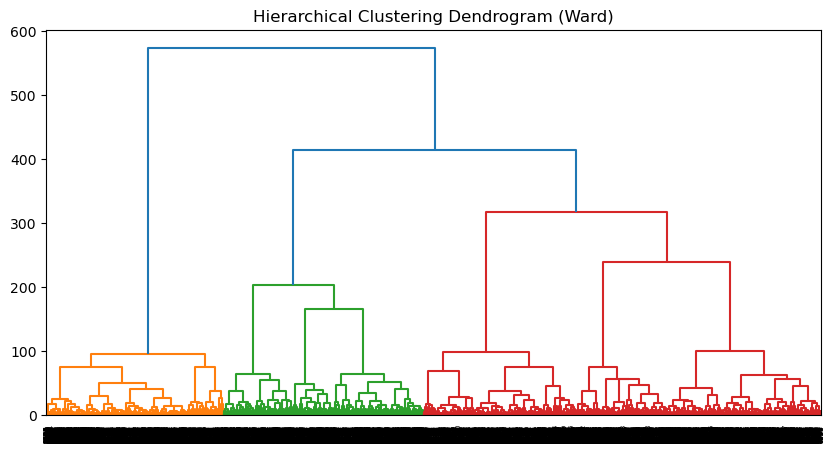

In [403]:
linked = linkage(scaled_data, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.show()

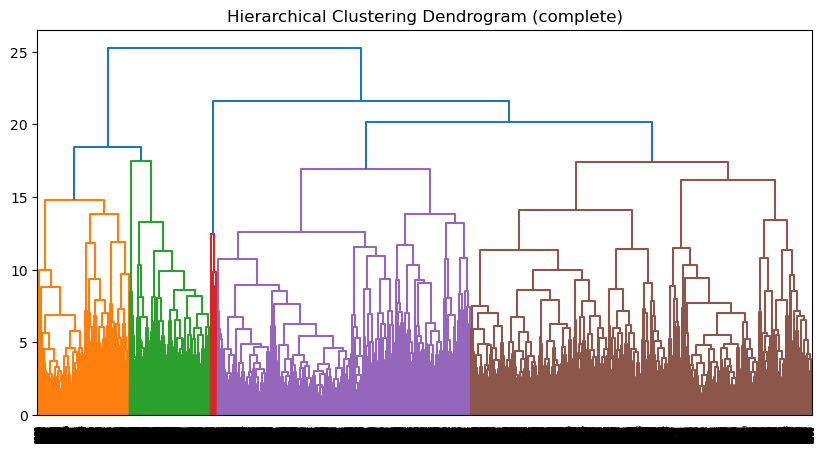

In [404]:
linked = linkage(scaled_data, 'complete')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram (complete)')
plt.show()

------> From last visulization we will cut at 7 clusture that appear clearly at linkage of complete

In [413]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 7

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters,linkage='ward',metric='euclidean')
hier_model.fit(scaled_data)
labelsH_ = hier_model.fit_predict(scaled_data)

--->use linkage "ward" and "'euclidean' according to our trials 

<Axes: xlabel='t-SNE Component 1', ylabel='t-SNE Component 2'>

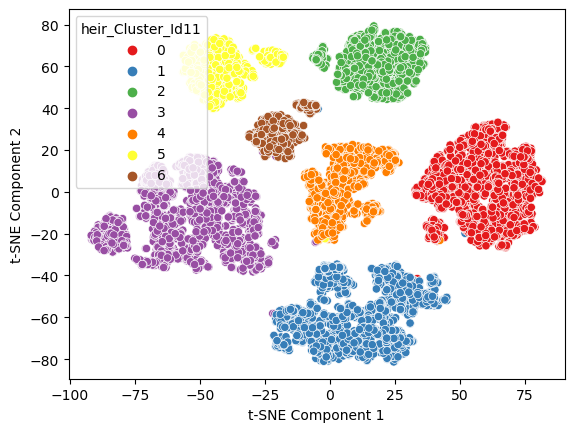

In [414]:
df_tsne['heir_Cluster_Id11'] = labelsH_
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne, hue=df_tsne['heir_Cluster_Id11'],palette='Set1')

In [415]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data , labelsH_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.4383270744568024


# GaussianMixture

In [408]:
from sklearn.mixture import GaussianMixture
n_clusters = 7

# Initialize the GaussianMixture model
gaussian_model = GaussianMixture(n_components=n_clusters,covariance_type='full')
labels_ = gaussian_model.fit_predict(scaled_data)

<Axes: xlabel='t-SNE Component 1', ylabel='t-SNE Component 2'>

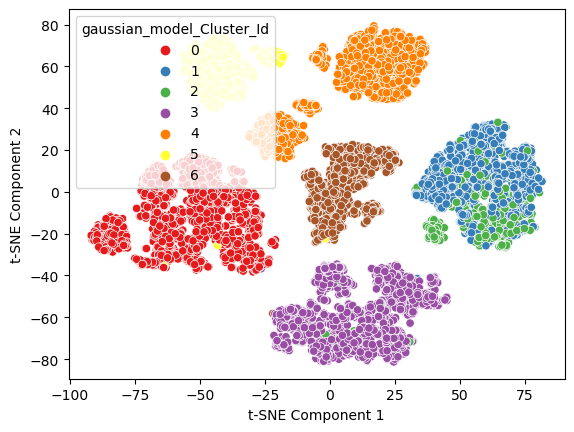

In [409]:
df_tsne['gaussian_model_Cluster_Id'] = labels_
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne, hue=df_tsne['gaussian_model_Cluster_Id'],palette='Set1')

In [410]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data , labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.34723272083019535


# Conclusion
#### Hierarchical Clustering better than Kmeans & DBSCAN and Gaussian

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [455]:
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(scaled_data)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.describe()


PC1           PC2           PC3           PC4           PC5  \
count  8.636000e+03  8.636000e+03  8.636000e+03  8.636000e+03  8.636000e+03   
mean   2.632859e-17 -5.002431e-16 -2.961966e-16  4.080931e-16 -5.265717e-16   
std    5.112915e+00  3.520961e+00  2.749116e+00  1.666496e+00  1.286170e+00   
min   -1.020163e+01 -9.852827e+00 -6.988952e+00 -5.723124e+00 -3.872804e+00   
25%   -3.788399e+00 -2.354790e+00 -1.311222e+00 -1.165083e+00 -7.297611e-01   
50%    1.528476e+00 -2.191996e-02  1.340666e-01  3.837278e-02 -2.786190e-01   
75%    3.554062e+00  2.045735e+00  1.766693e+00  1.050247e+00  3.689285e-01   
max    1.125068e+01  1.195612e+01  9.824996e+00  8.052893e+00  6.257352e+00   

                PC6           PC7           PC8           PC9          PC10  \
count  8.636000e+03  8.636000e+03  8.636000e+03  8.636000e+03  8.636000e+03   
mean  -6.565691e-16 -5.204010e-16 -1.566551e-15 -5.792289e-16  8.042560e-17   
std    9.710164e-01  9.193498e-01  6.715986e-01  5.610797e-01  5.252197e-01   
min   -3.027169e+00 -4.036373e+00 -3.018587e+00 -2.573827e+00 -2.552351e+00   
25%   -7.362598e-01 -5.694957e-01 -4.728080e-01 -3.570360e-01 -3.118031e-01   
50%   -7.408298e-02  3.677878e-02 -9.730541e-03 -8.074122e-02  7.550035e-02   
75%    7.169019e-01  6.269430e-01  4.684378e-01  2.802164e-01  2.564172e-01   
max    3.651990e+00  4.539076e+00  4.608954e+00  3.233889e+00  2.760688e+00   

               PC11          PC12          PC13          PC14          PC15  \
count  8.636000e+03  8.636000e+03  8.636000e+03  8.636000e+03  8.636000e+03   
mean   1.246494e-16  5.923932e-17  4.381241e-17  2.108344e-17 -8.947606e-18   
std    4.351563e-01  2.344023e-01  1.926801e-01  1.620856e-01  1.303766e-01   
min   -1.744894e+00 -8.228024e-01 -9.140189e-01 -8.190514e-01 -6.184376e-01   
25%   -1.271397e-01 -8.739066e-02 -1.134666e-01 -6.376255e-02 -7.637325e-02   
50%    3.361741e-02  8.849539e-03  5.765864e-03 -1.635854e-03 -7.726487e-03   
75%    1.129189e-01  1.289795e-01  1.084529e-01  8.280103e-02  6.746707e-02   
max    2.612225e+00  8.838766e-01  9.345297e-01  9.159317e-01  6.379547e-01   

               PC16          PC17  
count  8.636000e+03  8.636000e+03  
mean  -1.984929e-17  1.388422e-17  
std    7.509294e-02  7.321214e-02  
min   -3.894643e-01 -3.342725e-01  
25%   -4.044349e-02 -3.491458e-02  
50%    3.952913e-03 -3.804954e-04  
75%    3.516820e-02  3.969707e-02  
max    6.655096e-01  4.987162e-01

In [456]:
X_pca=X_pca.iloc[:,:7]
X_pca.shape

(8636, 7)

In [457]:
from sklearn.manifold import TSNE
import pandas as pd


X = X_pca.values

tsne = TSNE(n_components=2, random_state=42)

# Apply T-SNE transformation to your data
X_tsne = tsne.fit_transform(X)

# Assuming X_tsne is a NumPy array with transformed data
# You can convert it to a DataFrame if needed
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE_Component_1', 'TSNE_Component_2'])

<Axes: xlabel='TSNE_Component_1', ylabel='TSNE_Component_2'>

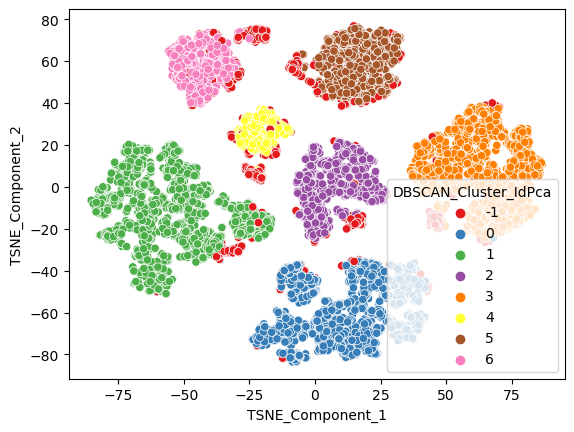

In [464]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=40)

# Fit the model
dbscan.fit(X_pca)

# Get the cluster labels
labels = dbscan.labels_
df_tsne['DBSCAN_Cluster_IdPca'] = labels
sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne, hue=df_tsne['DBSCAN_Cluster_IdPca'],palette='Set1')

<Axes: xlabel='TSNE_Component_1', ylabel='TSNE_Component_2'>

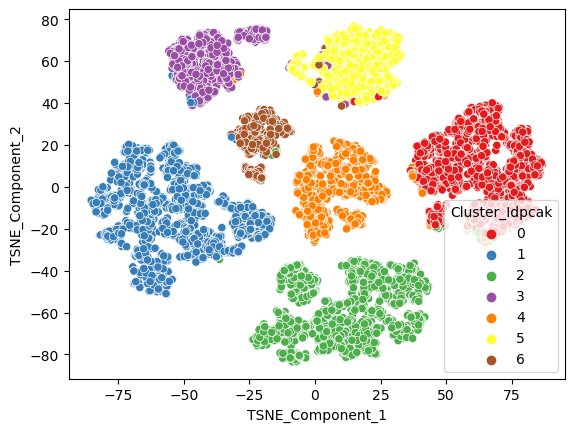

In [460]:
# Final model with k=7
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_pca)
df_tsne['Cluster_Idpcak'] = kmeans.labels_
sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne, hue=df_tsne['Cluster_Idpcak'],palette='Set1')

In [461]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca , kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4731423884245789


<Axes: xlabel='TSNE_Component_1', ylabel='TSNE_Component_2'>

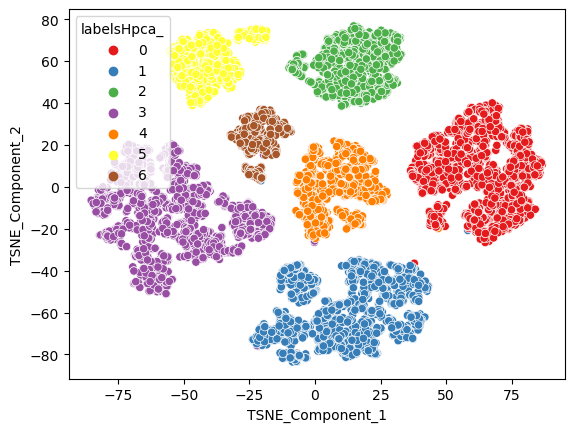

In [462]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 7

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters,linkage='ward',metric='euclidean')
hier_model.fit(scaled_data)
labelsHpca_ = hier_model.fit_predict(scaled_data)
df_tsne['labelsHpca_'] = labelsHpca_
sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne, hue=df_tsne['labelsHpca_'],palette='Set1')

In [463]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca , kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4731423884245789


# Conclusion
#### Hierarchical Clustering better than Kmeans & DBSCAN and Gaussian  with pca

In [437]:
df_final = df.copy()
df_final.dropna(inplace=True)

In [ ]:
df_final['Cluster'] = labelsH_
clusters = df_final['Cluster'].unique()

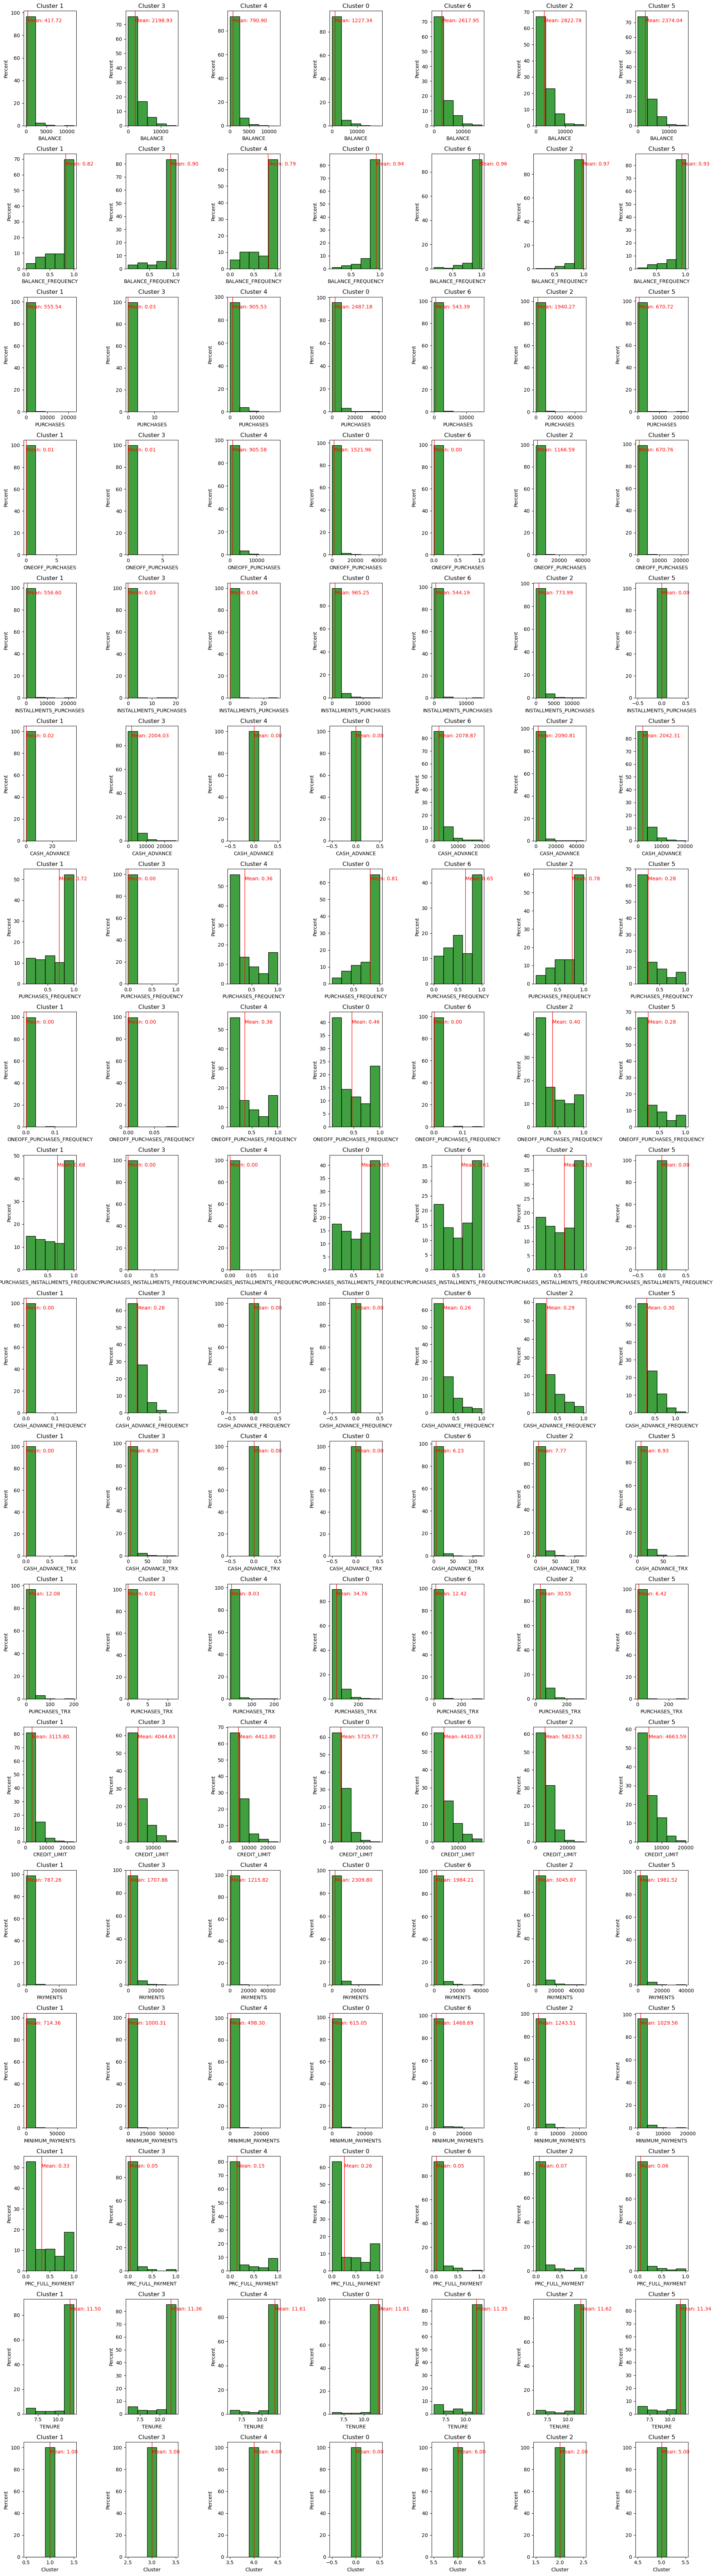

In [441]:

# Set up subplots
cols=df_final.columns
num_rows = len(cols)
num_cols = len(clusters)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows))

# Loop through each feature
for i, col in enumerate(cols):
    # Loop through each cluster
    for j, cluster in enumerate(clusters):
        # Select data points belonging to the current cluster
        data = df_final[df_final['Cluster'] == cluster][col]
        # Plot histogram for the current cluster in the current subplot
        sns.histplot(data, bins=5, ax=axes[i, j], stat='percent', color='green')
        axes[i, j].set_title(f'Cluster {cluster}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Percent')
        
        # Calculate mean
        mean_value = np.mean(data)
        # Annotate with mean value
        axes[i, j].axvline(mean_value, color='red', linestyle='-', linewidth=1)
        axes[i, j].text(mean_value, axes[i, j].get_ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='red')

# Adjust layout
plt.tight_layout()
plt.show()

**Cluster 0**:

Customer Behavior: <br>
Prefer making purchases in installments over opting for cash advances.<br>
Exhibit a consistent pattern of spending, with a high frequency of purchase behavior.<br>
Purchase Behavior:<br>
Mean amount of purchases made in installments: $965.25.<br>
Mean number of purchase transactions: approximately 34.76.<br>
Around 81% of customers exhibit frequent purchase behavior.<br>
Mean amount of total purchases: $2487.18.<br>
**Cluster 1**:

Customer Behavior:<br>
Moderate frequency of balance updates.<br>
Tend to make moderate purchases, with a preference for installment payments.<br>
Purchase Behavior:<br>
Mean amount of purchases made in installments: $556.60.<br>
Mean number of purchase transactions: approximately 12.08.<br>
Around 72% of customers exhibit frequent purchase behavior.<br>
Mean amount of total purchases: $555.54.<br>

**Cluster 2**:

Customer Behavior:<br>
High balance frequency, indicating frequent updates.<br>
Prefer making purchases with a moderate frequency, including both one-off and installment purchases.<br>
Purchase Behavior:<br>
Mean amount of purchases made in installments: $773.99.<br>
Mean number of purchase transactions: approximately 30.55.<br>
Around 78% of customers exhibit frequent purchase behavior.<br>
Mean amount of total purchases: $1940.27.<br><br>
**Cluster 3**:

Customer Behavior:<br>
Moderate balance frequency, with less frequent updates compared to other clusters.<br>
Limited purchase activity, with very low or zero purchase amounts and frequencies.<br>
Purchase Behavior:<br>
Mean amount of purchases made in installments: $0.03.<br>
Mean number of purchase transactions: approximately 0.01.<br>
Around 6% of customers exhibit frequent purchase behavior.<br>
Mean amount of total purchases: $0.03.<br><br>
**Cluster 4**:

Customer Behavior:<br>
Moderate balance frequency, indicating regular updates.<br>
Tend to make one-off purchases more frequently compared to other clusters.<br>
Purchase Behavior:<br>
Mean amount of purchases made in one-off transactions: $905.58.<br>
Mean number of purchase transactions: approximately 8.03.<br>
Around 36% of customers exhibit frequent one-off purchase behavior.<br>
Mean amount of total purchases: $905.53.<br><br>
**Cluster 5**:

Customer Behavior:<br>
High balance frequency, indicating frequent updates.<br>
Prefer making purchases in installments with a moderate frequency.<br>
Purchase Behavior:<br>
Mean amount of purchases made in installments: $670.76.<br>
Mean number of purchase transactions: approximately 6.42.<br>
Around 28% of customers exhibit frequent purchase behavior.<br>
Mean amount of total purchases: $670.72.<br><br>
**Cluster 6**:

Customer Behavior:<br>
High balance frequency, indicating frequent updates.<br>
Tend to make moderate purchases, with a preference for installment payments.<br>
Purchase Behavior:<br>
Mean amount of purchases made in installments: $544.19.<br>
Mean number of purchase transactions: approximately 12.42.<br>
Around 65% of customers exhibit frequent purchase behavior.<br>
Mean amount of total purchases: $543.39.<br><br>